#### Импорты

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Код

In [2]:
data_path = os.path.join("Данные для обработки", "Data")
files = sorted(os.listdir(data_path))
lines = []
for file in files:
    f = open(os.path.join(data_path, file))
    try:
        if "Alarm" not in file and "A" not in file:
            lines.append([[float(el) if ":" not in el else el for el in line.split()] for line in f.readlines()[1:]])
            lines[-1].insert(0, file)
    except Exception as err:
        print(file)
        print(err)
# Time	value_on_device_(l/h)_CO2	value_in_program_(l/h)_CO2	Gas_consumption_(l/h)_CO2	Temperature_(C)_CO2	value_on_device_(l/h)_Ar	value_in_program_(l/h)_Ar	Gas_consumption_(l/h)_Ar	Temperature_(C)_Ar_C

In [3]:
time_of_measuring = []
program_gas_level_co2 = []
gas_purge_rate_co2 = []
program_gas_level_ar = []
gas_purge_rate_ar = []
for i in range(len(lines)):
    date = lines[i][0][10:20].replace("_", ".")
    for line in lines[i][1:]:
        try:
            time_of_measuring.append(datetime.datetime.strptime(date + line[0], "%Y.%m.%d%H:%M:%S"))
            gas_purge_rate_co2.append(line[1])
            program_gas_level_co2.append(line[3])
            gas_purge_rate_ar.append(line[5])
            program_gas_level_ar.append(line[7])
        except Exception as err:
            print(err)

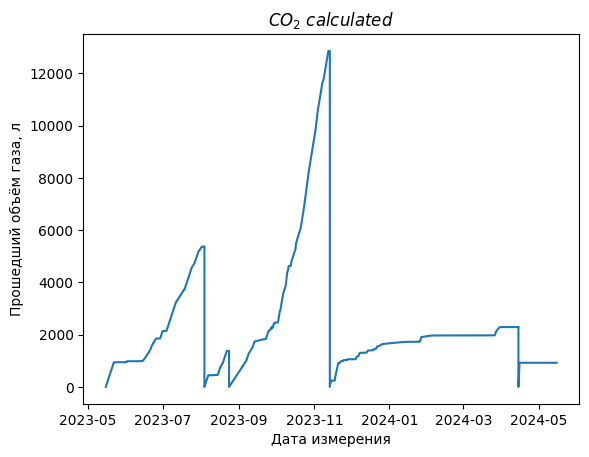

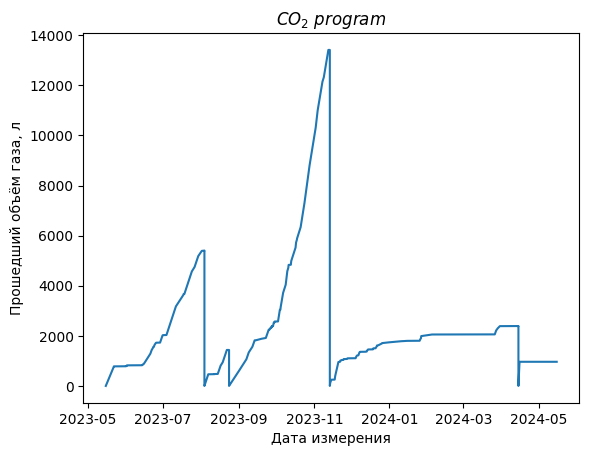

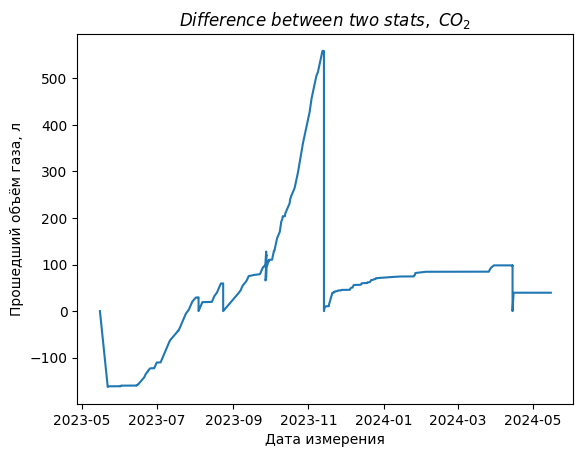

In [4]:
reset_days = [(el[0], el[1]) for el in sorted([(i, time_of_measuring[i], program_gas_level_co2[i]) for i in range(len(program_gas_level_co2))], key=lambda el: el[2])][:20]
reset_days = sorted(reset_days, key=lambda el: el[1])
first_date = reset_days[0][0]
reset_days = [reset_days[i][0] for i in range(1, len(reset_days)) if reset_days[i][1].date() != reset_days[i - 1][1].date()]
if first_date not in reset_days:
    reset_days.append(first_date)

calculated_gas_level_co2 = []
for i in range(len(time_of_measuring)):
    if i in reset_days:
        calculated_gas_level_co2.append(program_gas_level_co2[i])
    else:
        if i + 1 < len(time_of_measuring):
            calculated_gas_level_co2.append(float(str(time_of_measuring[i + 1] - time_of_measuring[i]).split(":")[-1]) / 3600 * gas_purge_rate_co2[i] + calculated_gas_level_co2[-1])
        else:
            calculated_gas_level_co2.append((60 - float(str(time_of_measuring[i].time()).split(":")[-1])) / 3600 * gas_purge_rate_co2[i] + calculated_gas_level_co2[-1])

plt.title("$CO_2 \ calculated$")
plt.xlabel("Дата измерения")
plt.ylabel("Прошедший объём газа, л")
plt.plot(time_of_measuring, calculated_gas_level_co2)
plt.show()

plt.title("$CO_2 \ program$")
plt.xlabel("Дата измерения")
plt.ylabel("Прошедший объём газа, л")
plt.plot(time_of_measuring, program_gas_level_co2)
plt.show()

difference_co2 = [program_gas_level_co2[i] - calculated_gas_level_co2[i] for i in range(len(calculated_gas_level_co2))]
plt.title("$Difference \ between \ two \ stats, \ CO_2$")
plt.xlabel("Дата измерения")
plt.ylabel("Прошедший объём газа, л")
plt.plot(time_of_measuring, difference_co2)
plt.show()

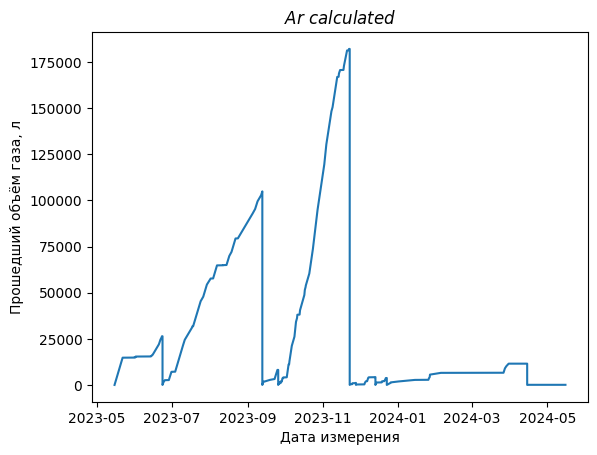

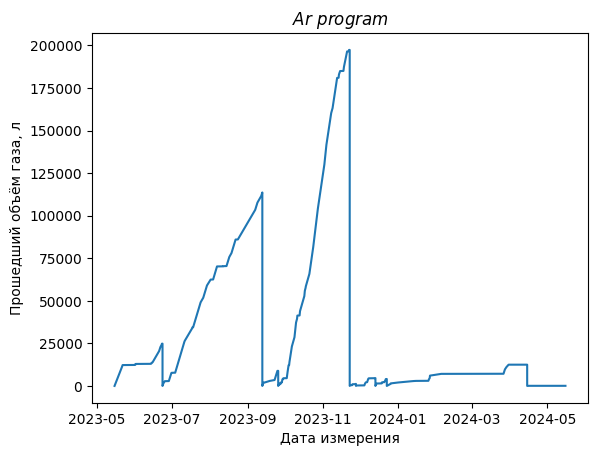

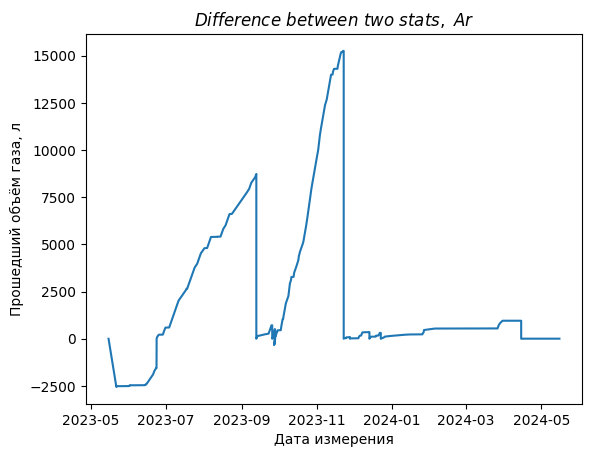

In [5]:
reset_days = [(el[0], el[1]) for el in sorted([(i, time_of_measuring[i], program_gas_level_ar[i]) for i in range(len(program_gas_level_ar))], key=lambda el: el[2])][:100]
reset_days = sorted(reset_days, key=lambda el: el[1])
first_date = reset_days[0][0]
reset_days = [reset_days[i][0] for i in range(1, len(reset_days)) if reset_days[i][1].date() != reset_days[i - 1][1].date()]
if first_date not in reset_days:
    reset_days.append(first_date)

calculated_gas_level_ar = []
for i in range(len(time_of_measuring)):
    if i in reset_days:
        calculated_gas_level_ar.append(program_gas_level_ar[i])
    else:
        if i + 1 < len(time_of_measuring):
            calculated_gas_level_ar.append(float(str(time_of_measuring[i + 1] - time_of_measuring[i]).split(":")[-1]) / 3600 * gas_purge_rate_ar[i] + calculated_gas_level_ar[-1])
        else:
            calculated_gas_level_ar.append((60 - float(str(time_of_measuring[i].time()).split(":")[-1])) / 3600 * gas_purge_rate_ar[i] + calculated_gas_level_ar[-1])

plt.title("$Ar \ calculated$")
plt.xlabel("Дата измерения")
plt.ylabel("Прошедший объём газа, л")
plt.plot(time_of_measuring, calculated_gas_level_ar)
plt.show()

plt.title("$Ar \ program$")
plt.xlabel("Дата измерения")
plt.ylabel("Прошедший объём газа, л")
plt.plot(time_of_measuring, program_gas_level_ar)
plt.show()

difference_ar = [program_gas_level_ar[i] - calculated_gas_level_ar[i] for i in range(len(calculated_gas_level_ar))]
plt.title("$Difference \ between \ two \ stats, \ Ar$")
plt.xlabel("Дата измерения")
plt.ylabel("Прошедший объём газа, л")
plt.plot(time_of_measuring, difference_ar)
plt.show()